In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.shape

(200, 5)

In [ ]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Text(0, 0.5, 'Sales')

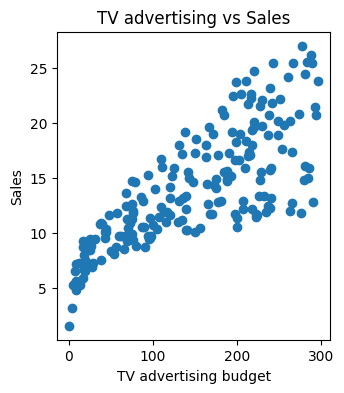

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.scatter(df['TV'], df['Sales'])
plt.title('TV advertising vs Sales')
plt.xlabel('TV advertising budget')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

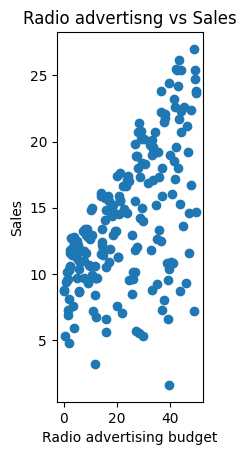

In [ ]:
plt.subplot(132)
plt.scatter(df['Radio'], df['Sales'])
plt.title('Radio advertisng vs Sales')
plt.xlabel('Radio advertising budget')
plt.ylabel('Sales')

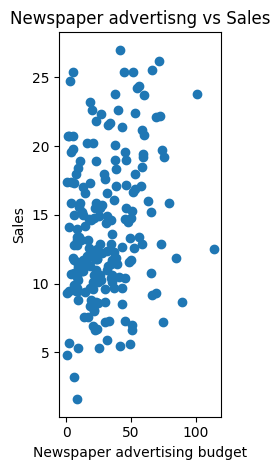

In [ ]:
plt.subplot(133)
plt.scatter(df['Newspaper'], df['Sales'])
plt.title('Newspaper advertisng vs Sales')
plt.xlabel('Newspaper advertising budget')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

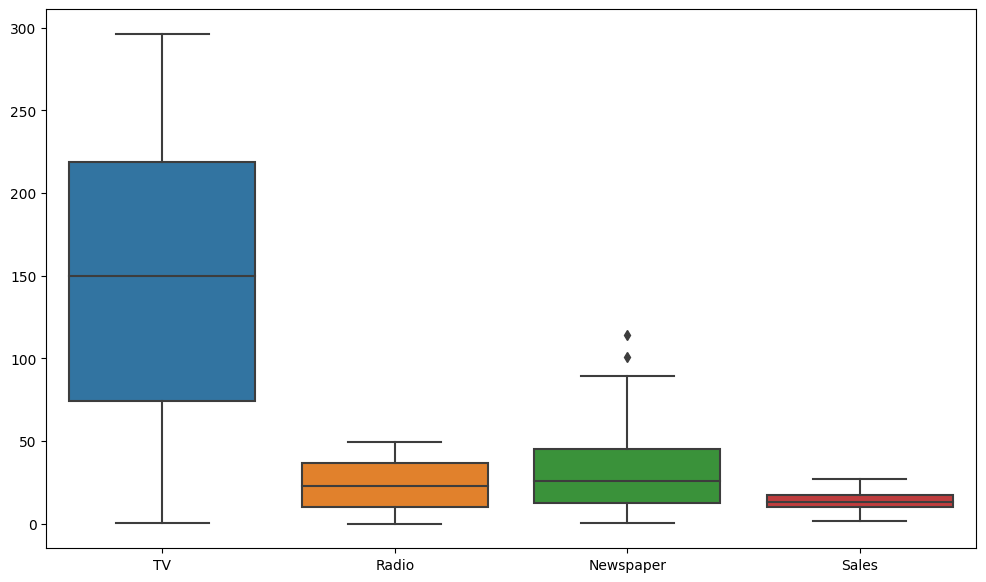

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(data = df)
plt.show()

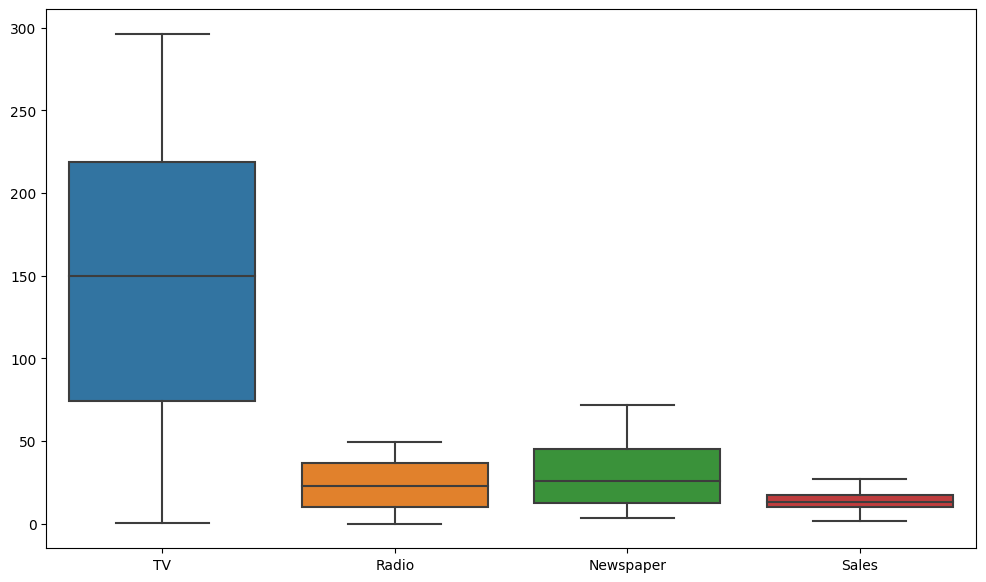

In [ ]:
from scipy.stats.mstats import winsorize
column_to_winsorize = 'Newspaper'
df[column_to_winsorize] = winsorize(df[column_to_winsorize], limits=(0.05, 0.05))
plt.figure(figsize=(12,7))
sns.boxplot(data = df)
plt.show()

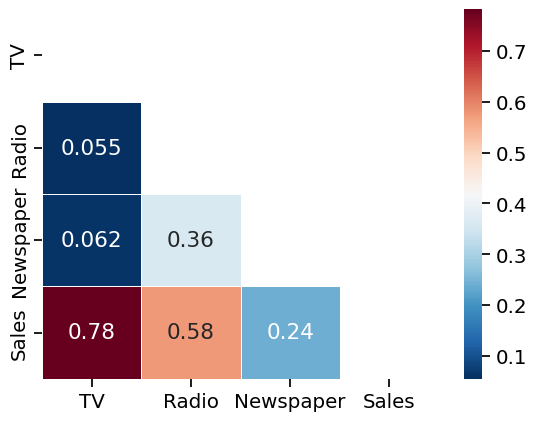

In [ ]:
sns.set_context('notebook', font_scale=1.3)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, cmap='RdBu_r', linewidths=0.5, mask=mask)
plt.show()

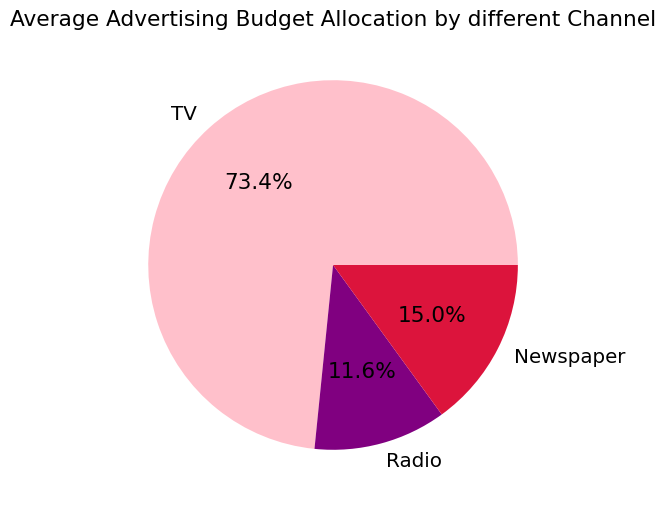

In [ ]:
average_budget = df[['TV', 'Radio', 'Newspaper']].mean()
plt.figure(figsize=(8, 6))
plt.pie(average_budget, labels=average_budget.index, autopct='%1.1f%%', colors=['pink', 'purple', 'crimson'])
plt.title('Average Advertising Budget Allocation by different Channel')
plt.show()

In [ ]:
X = df.drop('Sales', axis=1)
y = df['Sales']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ['TV', 'Radio', 'Newspaper', 'Sales']
df[cols] = scaler.fit_transform(df[cols])
df.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.955484,1.552053
1,-1.197376,1.082808,0.752217,-0.696046
2,-1.516155,1.528463,1.960477,-0.907406
3,0.052050,1.217855,1.421253,0.860330
4,0.394182,-0.841614,1.416261,-0.215683


In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
pd.DataFrame({'Actual_y': y_test,'Predicted_y':y_pred_linear })

,Actual_y,Predicted_y
95,16.9,16.572124
15,22.4,21.196014
30,21.4,21.558759
158,7.3,10.890762
128,24.7,22.202849
115,12.6,13.360198
69,22.3,21.199615
170,8.4,7.346498
174,11.5,13.274532
45,14.9,15.126730


In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred_linear,squared=False)
MSE

1.9395548328970966

In [ ]:
RMSE = np.sqrt(MSE)
RMSE

1.3926790128730657

In [ ]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred_linear)
MAE

1.5035596259580652

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_linear)
print("R-squared:", r2)

R-squared: 0.8622257128214504


<function matplotlib.pyplot.show(close=None, block=None)>

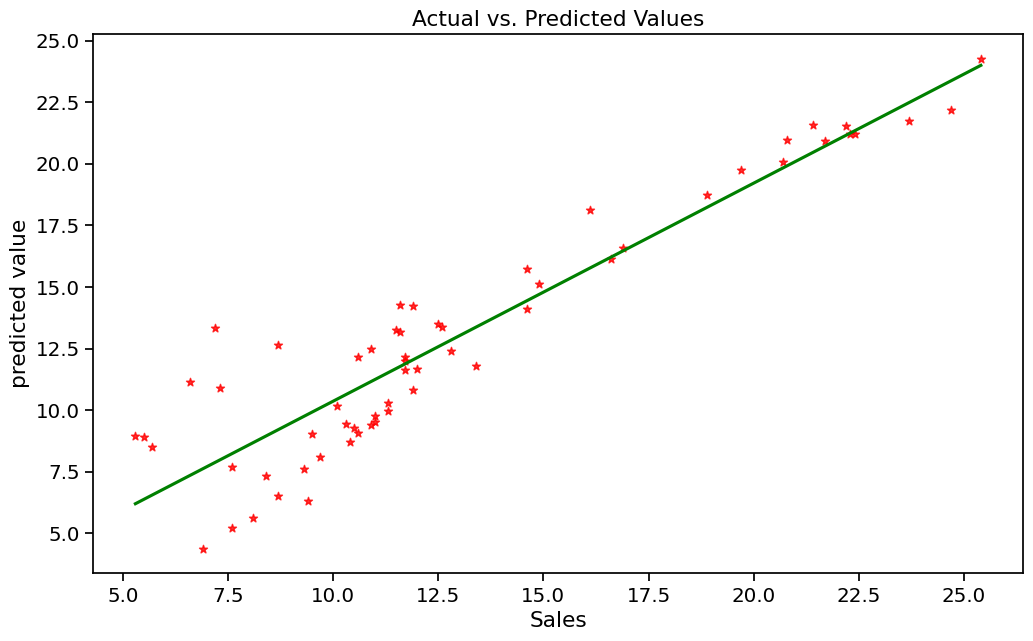

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("Actual value")
plt.ylabel("predicted value")
plt.title('Actual vs. Predicted Values')
sns.regplot(x=y_test, y=y_pred_linear, ci=None, color='red', marker="*",line_kws={"color": "green"})
plt.show

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
pd.DataFrame({'Actual_y': y_test,'Predicted_y':y_pred_ridge })

,Actual_y,Predicted_y
95,16.9,16.572104
15,22.4,21.195873
30,21.4,21.558750
158,7.3,10.890683
128,24.7,22.202612
115,12.6,13.360148
69,22.3,21.199458
170,8.4,7.346563
174,11.5,13.274655
45,14.9,15.126740


In [ ]:
MSE_r = mean_squared_error(y_test, y_pred_ridge,squared=False)
MSE_r

1.939525416309732

In [ ]:
RMSE_r = np.sqrt(MSE_r)
RMSE_r

1.392668451681782

In [ ]:
MAE_r = mean_absolute_error(y_test, y_pred_ridge)
MAE_r

1.5035477558529502

In [ ]:
from sklearn.metrics import r2_score
r2_r = r2_score(y_test, y_pred_ridge)
print("R-squared:", r2_r)

R-squared: 0.8622298919439506
